11.3-11

In [70]:
(3)*(4500)*((1/3)*(2/3))

3000.0

In [71]:
2 - 3000/275

-8.909090909090908

In [72]:
from scipy.constants import R
import numpy as np

R * (np.log(1/3) + 2 * np.log(2/3)) - 2 + 3000/275

-6.967728865252843

In [73]:
A = (4500 - 3 * 320) / R / 320
A

1.3305129276846788

azeotrope composition: 0.5986


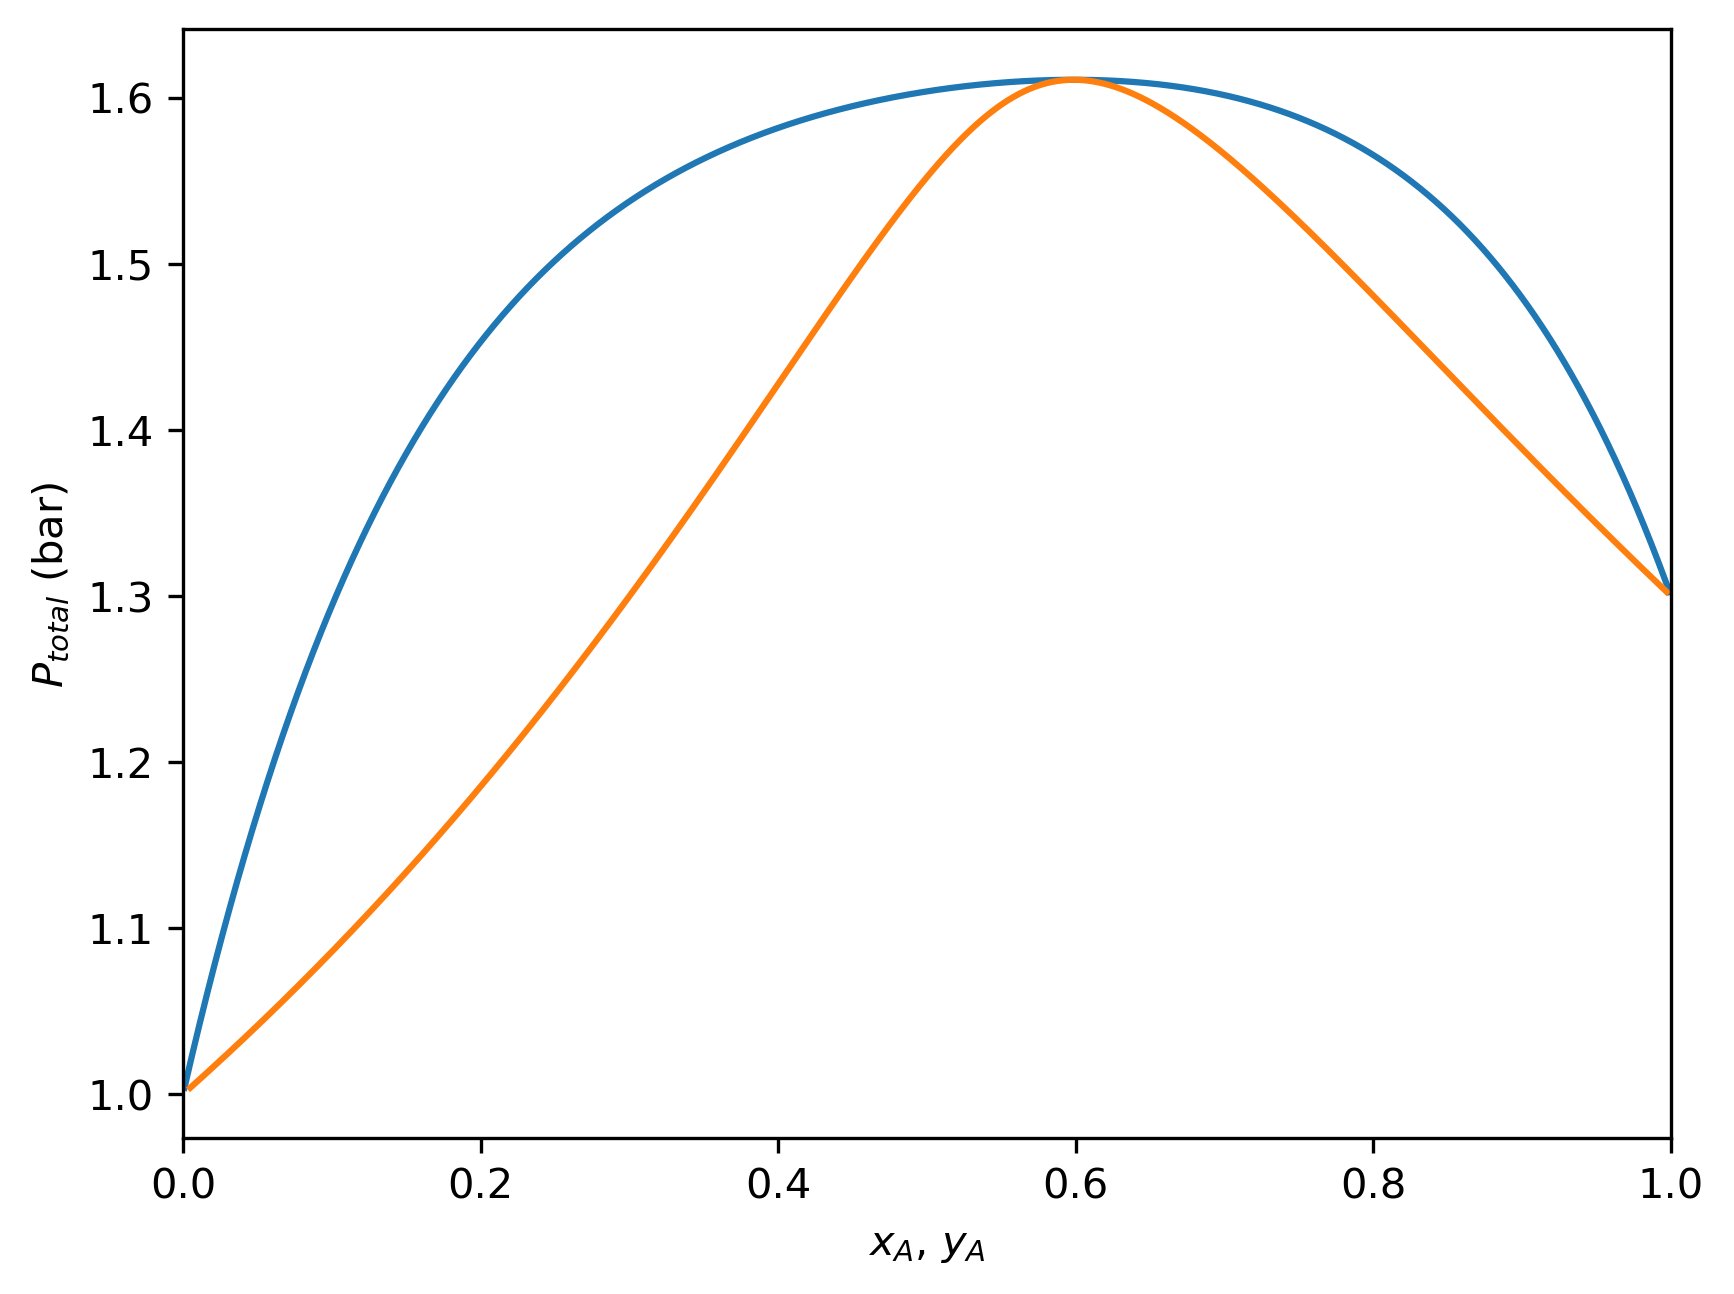

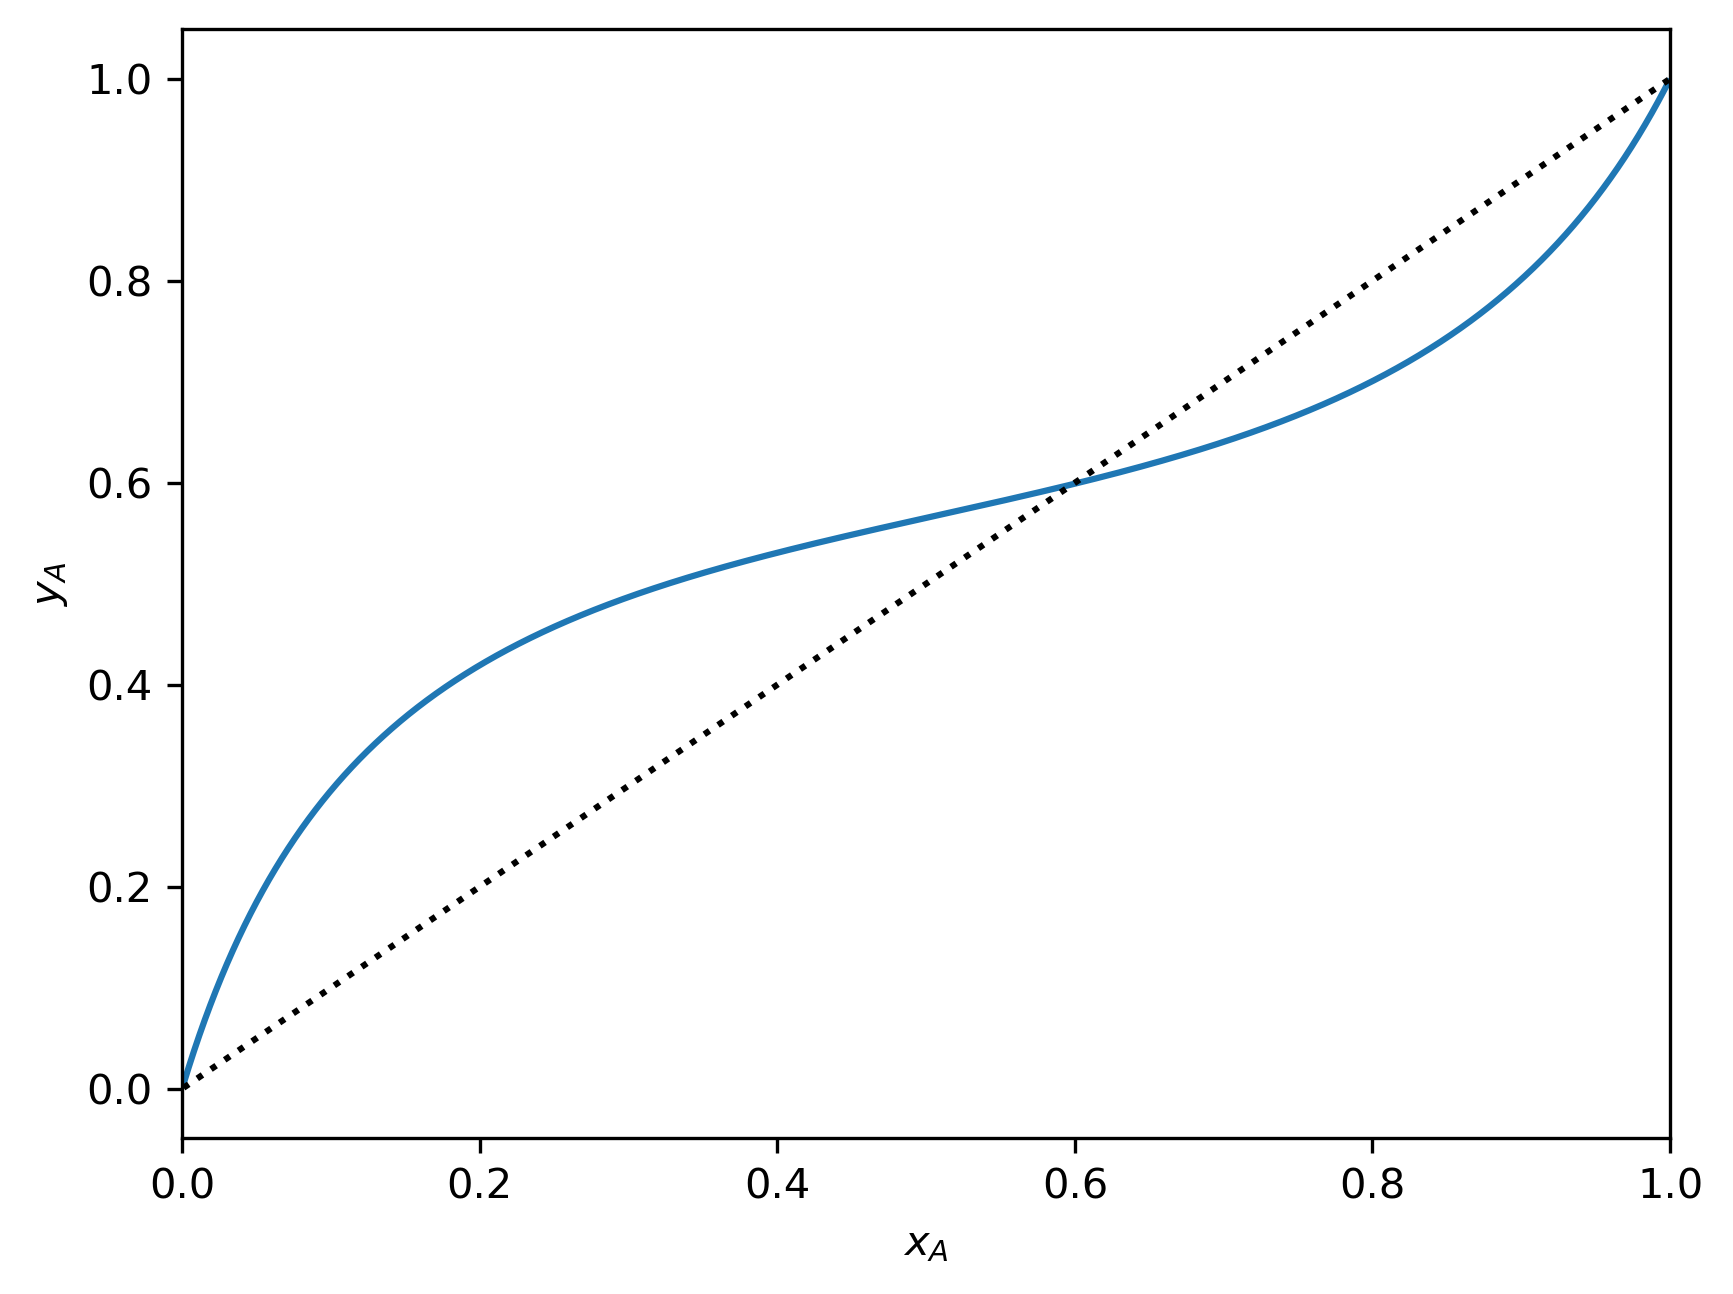

In [78]:
x1 = np.linspace(0.001,0.999,100000)
x2 = 1-x1

gamma1 = np.exp(A * x2**2)
gamma2 = np.exp(A * x1**2)

pvap1 = 1.3 # bar
pvap2 = 1.0
import matplotlib.pyplot as plt

fig,ax = plt.subplots(dpi=300)

ptotal = x1 * gamma1 * pvap1 + x2 * gamma2 * pvap2
ax.plot(x1, ptotal);

y1 = x1 * gamma1 * pvap1 / ptotal
ax.plot(y1, ptotal);
ax.set(xlim=(0,1), xlabel='$x_A$, $y_A$', ylabel='$P_{total}$ (bar)')

print(f'azeotrope composition: {x1[np.argmax(ptotal)]:.4f}')



fig,ax = plt.subplots(dpi=300)

ax.plot(x1, y1);
ax.plot(x1, x1, c='black', linestyle=':')
ax.set(xlim=(0,1), xlabel='$x_A$', ylabel='$y_A$');

In [75]:
from scipy.optimize import fsolve


def x_from_p(x):
    x1 = x
    x2 = 1-x1

    gamma1 = np.exp(A * x2**2)
    gamma2 = np.exp(A * x1**2)

    pvap1 = 1.3 # bar
    pvap2 = 1.0

    return 1.5 - (x1 * gamma1 * pvap1 + x2 * gamma2 * pvap2)

xa = fsolve(x_from_p, 0.333)[0]

In [76]:
print(f'xa: {xa:.3f}')
print(f'xb: {1-xa:.3f}\n')

ya = xa * np.exp(A * (1-xa)**2) * pvap1 / 1.5
print(f'ya: {ya:.3f}')
print(f'yb: {1-ya:.3f}\n')

def find_l(L):
    return xa - 1 / (L + (pvap1/1.5) * np.exp(A * (1-xa)**2) * (3-L))
L = fsolve(find_l, 0.6)[0]

print(f'L: {L:.3f}')
print(f'V: {3-L:.3f}\n')

print(f'L/N: {L/3:.3f}')
print(f'V/N: {1-L/3:.3f}')



xa: 0.248
xb: 0.752

ya: 0.456
yb: 0.544

L: 1.765
V: 1.235

L/N: 0.588
V/N: 0.412
